# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from seaborn import load_dataset
import statsmodels.formula.api as smf
import patsy

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# Criar a matriz de design (e a matriz y) com Patsy
y, X = patsy.dmatrices("tip ~ sex + smoker + C(time) + net_bill", tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  C(time)[T.Dinner]  net_bill
          1              1             1                  1     15.98
          1              0             1                  1      8.68
          1              0             1                  1     17.51
          1              0             1                  1     20.37
          1              1             1                  1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'C(time)' (column 3)
    'net_bill' (column 4)

In [4]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

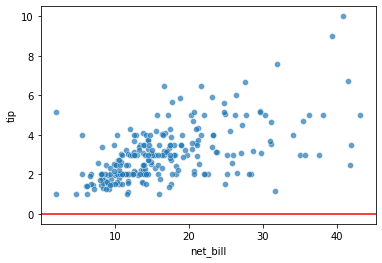

In [5]:
# Análise de resíduos
sns.scatterplot(x='net_bill', y='tip', data=tips, alpha=.70)
plt.axhline(y=0, color='r', linestyle='-')

In [6]:
# Análise Resíduos net_bill no log
reg_log = smf.ols('tip ~ np.log(net_bill) + sex + smoker + C(time)', data = tips).fit()
tips['reg_log'] = reg_log.resid

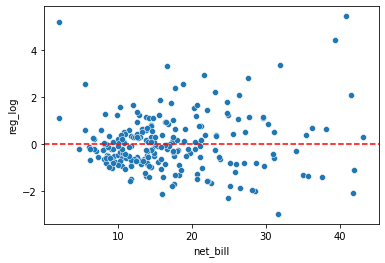

In [7]:
sns.scatterplot(x='net_bill', y='reg_log', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [8]:
# Análise Resíduos net_bill no polinômio
reg_polinomio = smf.ols('tip ~ np.poly1d(net_bill) + C(time) + smoker + sex', data=tips).fit()
tips['reg_polinomio'] = reg_polinomio.resid

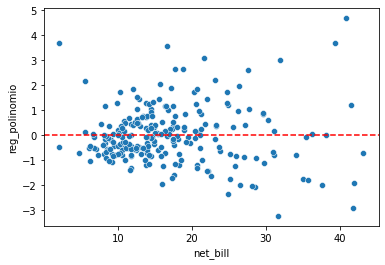

In [9]:
sns.scatterplot(x='net_bill', y='reg_polinomio', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

#### Melhor modelo:??????

In [10]:

reg_tip = smf.ols('tip ~ np.log(net_bill)', data=tips).fit()
print(reg_tip.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           4.40e-20
Time:                        11:23:56   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
y, X = patsy.dmatrices("tip_pct ~ sex + smoker + C(time) + net_bill", tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  C(time)[T.Dinner]  net_bill
          1              1             1                  1     15.98
          1              0             1                  1      8.68
          1              0             1                  1     17.51
          1              0             1                  1     20.37
          1              1             1                  1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'C(time)' (column 3)
    'net_bill' (column 4)

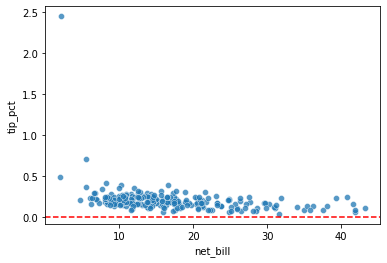

In [12]:
# Gráfico de resíduos em função de net_bill
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

In [13]:
# R² tip_pct
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           1.52e-06
Time:                        11:23:57   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

In [14]:
# Análise Resíduos net_bill no log
reg_log = smf.ols('tip_pct ~ np.log(net_bill) + sex + smoker + C(time)', data = tips).fit()
tips['reg_log'] = reg_log.resid

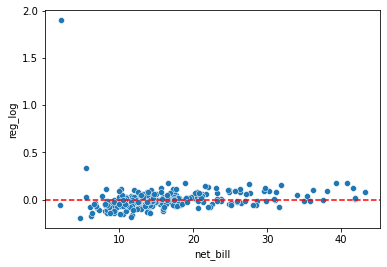

In [15]:
sns.scatterplot(x='net_bill', y='reg_log', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [16]:
# Análise Resíduos net_bill no polinômio
reg_polinomio = smf.ols('tip_pct ~ np.poly1d(net_bill) + C(time) + smoker + sex', data=tips).fit()
tips['reg_polinomio'] = reg_polinomio.resid

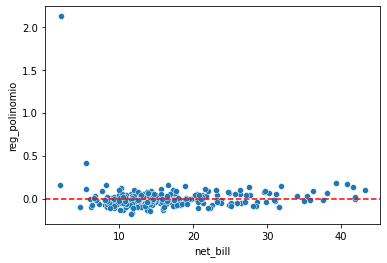

In [17]:
sns.scatterplot(x='net_bill', y='reg_polinomio', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [18]:
# O melhor modelo é o log de net_bill

# Calcular o r² na escala tip_pct sem o log
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           1.52e-06
Time:                        11:23:57   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

Comparando o coeficiente de determinação entre o reg_log de net_bill (item I) e sem o log, percebe-se que o maior valor é o do reg_log.<br>
Quanto maior o valor do R-quadrado, melhor o modelo se ajusta aos dados. Nesse caso, um valor de R-quadrado de 0,291 é melhor do que um valor de R-quadrado de 0,091 porque indica que o modelo explica mais da variabilidade dos dados de resposta em torno de sua média. 

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [19]:
# Carregando a base de dados
prev_renda = pd.read_csv('previsao_renda.csv')
prev_renda.head()

,Unnamed: 0,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [22]:
# Verificando se há valores ausentes
print(prev_renda['tempo_emprego'].isnull().any())
print(prev_renda['renda'].isnull().any())

True
False


In [26]:
prev_renda.tempo_emprego.isnull().sum()

2534

In [27]:
# Vamos deletar os valores ausentes na coluna 'tempo_emprego'
prev_renda.dropna(subset=['tempo_emprego'], inplace=True)

In [28]:
# verificando se ainda há valores ausentes
prev_renda.tempo_emprego.isnull().sum()

0

In [29]:
# Matriz de design
y, X = patsy.dmatrices("renda ~ tempo_emprego", prev_renda[:5])
X

DesignMatrix with shape (5, 2)
  Intercept  tempo_emprego
          1        3.57534
          1        0.86027
          1        8.06575
          1        1.20822
          1       13.87397
  Terms:
    'Intercept' (column 0)
    'tempo_emprego' (column 1)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                -4.559e-12
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               1.00
Time:                        13:28:57   Log-Likelihood:             3.2071e+05
No. Observations:               12466   AIC:                        -6.414e+05
Df Residuals:                   12464   BIC:                        -6.414e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.986e-29   2.21e-14   3.61e-15

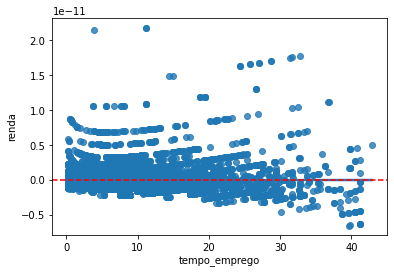

In [65]:
# Análise de resíduos

# Reproduzindo a regressão
reg_renda = smf.ols('renda ~ tempo_emprego', data=prev_renda).fit()
print(reg_renda.summary())
prev_renda['renda'] = reg_renda.resid

# gráfico de dispersão
sns.regplot(y='renda', x='tempo_emprego', data = prev_renda);
plt.axhline(y=0, color='r', linestyle='--')

Esta análise resultou em um R² baixo, vamos tentar melhorar fazendo algumas modificações na variável 'tempo_emprego'.

Usando função log('tempo_emprego)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                -4.559e-12
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               1.00
Time:                        13:21:46   Log-Likelihood:             3.2071e+05
No. Observations:               12466   AIC:                        -6.414e+05
Df Residuals:                   12464   BIC:                        -6.414e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.574e-

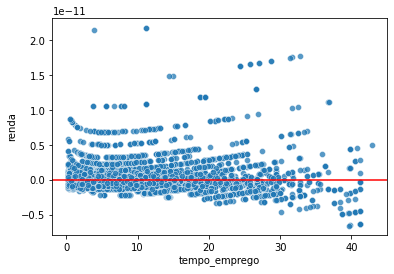

In [62]:
renda_log = smf.ols('renda ~ np.log(tempo_emprego)', data = prev_renda).fit()
print(renda_log.summary())
prev_renda['renda'] = renda_log.resid

sns.scatterplot(x='tempo_emprego', y='renda', data=prev_renda, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='-')

Usando função polinomial para 'tempo_emprego'

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 1.437e-12
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               1.00
Time:                        12:23:35   Log-Likelihood:            -1.2285e+05
No. Observations:               12466   AIC:                         2.457e+05
Df Residuals:                   12464   BIC:                         2.457e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

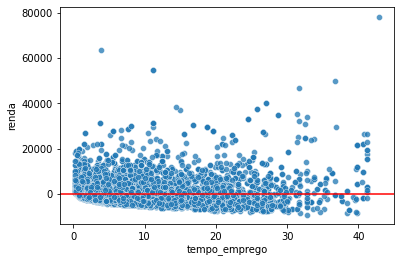

In [46]:
renda_poli = smf.ols('renda ~ np.poly1d(tempo_emprego)', data=prev_renda).fit()
print(renda_poli.summary())
prev_renda['renda'] = renda_poli.resid

sns.scatterplot(x='tempo_emprego', y='renda', data=prev_renda, alpha=.75)
plt.axhline(y=0, color='r', linestyle='-')

Usando função exponecial para 'tempo_emprego


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.688
Date:                Tue, 22 Aug 2023   Prob (F-statistic):             0.0304
Time:                        12:38:36   Log-Likelihood:            -1.2265e+05
No. Observations:               12466   AIC:                         2.453e+05
Df Residuals:                   12464   BIC:                         2.453e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

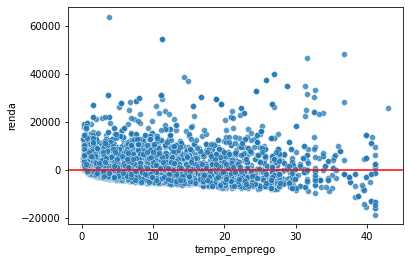

In [53]:
reg_exp = smf.ols('renda ~ np.power(tempo_emprego, 2)', data=prev_renda).fit()
print(reg_exp.summary())
prev_renda['renda'] = reg_exp.resid

sns.scatterplot(x='tempo_emprego', y='renda', data=prev_renda, alpha=.75)
plt.axhline(y=0, color='r', linestyle='-')

Modelo de Regressão Linear Múltipla

In [67]:
prev_renda.head()

,Unnamed: 0,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
0,0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,-1.265211e-13,-991.201157
1,1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,1.855437e-12,3690.493559
2,2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,3.317409e-13,182.159837
3,3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,5.995779e-13,4374.971766
4,4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,-6.411014e-13,-2203.716615


<Axes: xlabel='tempo_emprego', ylabel='renda'>

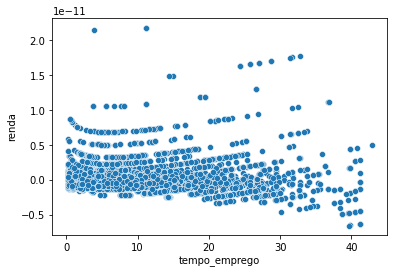

In [142]:
sns.scatterplot(x='tempo_emprego', y='renda', data=prev_renda)

In [128]:
reg_multipla = smf.ols('renda ~ tempo_emprego + C(posse_de_veiculo) + C(posse_de_imovel) + C(educacao) + idade + C(sexo) + qtd_filhos + C(tipo_residencia) + C(estado_civil) + C(tipo_renda)', data=prev_renda).fit()
print(reg_multipla.summary())
prev_renda['renda_mult'] = reg_multipla.resid 

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     42.01
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          5.24e-182
Time:                        14:12:56   Log-Likelihood:             3.2118e+05
No. Observations:               12466   AIC:                        -6.423e+05
Df Residuals:                   12442   BIC:                        -6.421e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [161]:
# Modelo com variáveis mais relevantes
reg_multipla_2 = smf.ols('renda ~  idade +  tempo_emprego + C(sexo)', data=prev_renda).fit()
print(reg_multipla_2.summary())
prev_renda['renda_mult'] = reg_multipla_2.resid 

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     243.1
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          2.45e-153
Time:                        14:29:45   Log-Likelihood:             3.2106e+05
No. Observations:               12466   AIC:                        -6.421e+05
Df Residuals:                   12462   BIC:                        -6.421e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.508e-13   6.61e-14     -9.845

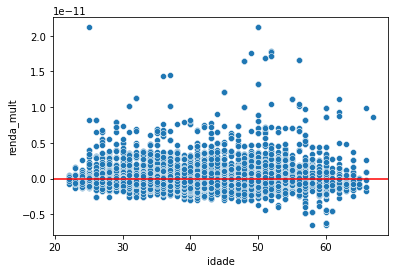

In [166]:
sns.scatterplot(x='idade', y='renda_mult', data=prev_renda)
plt.axhline(y=0, color='r', linestyle='-')

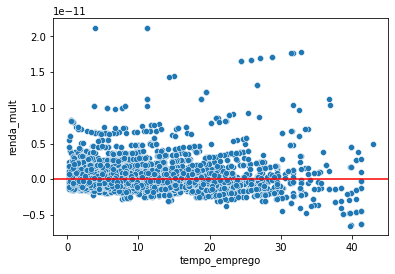

In [167]:
sns.scatterplot(x='tempo_emprego', y='renda_mult', data=prev_renda)
plt.axhline(y=0, color='r', linestyle='-')

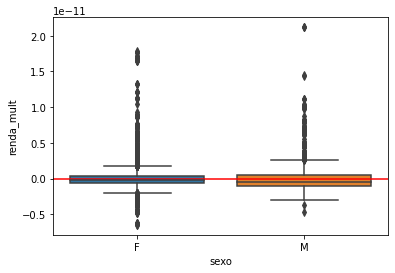

In [168]:
sns.boxplot(x='sexo', y='renda_mult', data=prev_renda)
plt.axhline(y=0, color='r', linestyle='-')